## Table of content 

### Step 1: Collect and Explore Data
* 1.1. Choose a dataset: Find a suitable real-world classification dataset 
* 1.2. Load the dataset: Use Pandas to load and explore the dataset, analyze its structure, and check for missing or unbalanced data.

### Step 2: Data Preprocessing
* 2.1. Handle missing values: Use imputation techniques or drop rows/columns with missing values.
* 2.2. Encode categorical variables: Convert categorical variables into numerical values using techniques like one-hot encoding or ordinal encoding.
* 2.3. Feature scaling: Scale features using standardization or normalization.

### Step 3: Split Data into Training and Testing Sets
* 3.1. Use the train_test_split function from scikit-learn to split the data into training and testing sets.

### Step 4: Train and Evaluate Models
* 4.1. Import classifiers: Import various classifiers from scikit-learn, such as Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Decision Trees, and Random Forests.
* 4.2. Train models: Fit the classifiers to the training data.
* 4.3. Evaluate models: Use evaluation metrics like accuracy, precision, recall, F1 score, and ROC AUC to assess model performance on the testing set.

### Step 5: Model Tuning
* 5.1. Hyperparameter tuning: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the chosen model.
* 5.2. Cross-validation: Implement k-fold cross-validation to validate model performance.
* 5.3 Saving the model

### Step 6: Create Streamlit Web App
* 6.1. Install Streamlit: Install the Streamlit library and create a new Python script for the web app.
* 6.2. Design app layout: Define the layout, input fields, and buttons for the web app.
* 6.3. Load trained model: Load the best performing and tuned model from the training phase.
* 6.4. User input processing: Process user input from the web app, applying the same preprocessing techniques used during the training phase.
* 6.5. Model prediction: Make predictions using the trained model and display the results in the web app.
* 6.6. Run Streamlit app: Run the Streamlit app using the streamlit run app.py command in your terminal.

### Step 7: Deploy the Web App 

## Step 1: Collect and Explore Data

* 1.1. Download the dataset from Kaggle: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
* 1.2. Load the dataset using Pandas:

In [10]:
import pandas as pd

data = pd.read_csv('../data/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 409.6 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 471.4 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 471.4 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 444.3 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 520.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated p


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import seaborn as sns
sns.countplot(data['Exited'])

* 1.3. Explore the dataset by checking its structure and basic statistics:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
#statistical summary
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Step 2: Data Preprocessing

* 2.1. Drop unnecessary columns (e.g., 'RowNumber', 'CustomerId', 'Surname'):

In [12]:
# dropping unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* 2.2. Handle categorical variables (e.g., 'Geography', 'Gender'):

In [6]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
# encoding 
data_dum = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


* 2.3. Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_dum = data_dum.drop('Exited', axis=1)
data_scaled = pd.DataFrame(scaler.fit_transform(data_dum), columns=data_dum.columns)
data_scaled.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


## Step 3: Split Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

X = data_scaled
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train and Evaluate Models

* 4.1. Import classifiers and train models:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {round(model.score(X_test, y_test)*100,1)}%")


Logistic Regression: 81.1%
K-Nearest Neighbors: 83.0%
Support Vector Machines: 85.6%
Decision Trees: 77.5%
Random Forests: 86.7%


## Step 5: Model Tuning

* 5.1. Hyperparameter tuning using GridSearchCV (example for Random Forests):

In [19]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")


Best model: RandomForestClassifier(min_samples_leaf=2, min_samples_split=10)
Best score: 0.8658750000000002
CPU times: total: 6.47 s
Wall time: 8min 11s


* 5.2 feature_selection using  RFECV

In [20]:
%%time

from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Gender_Male'],
      dtype='object')
Feature ranks: [1 1 1 1 1 1 1 1 1 2 1]
CPU times: total: 3min 13s
Wall time: 3min 41s


The output of RFECV (Recursive Feature Elimination with Cross-Validation) is a list of features that are selected by the algorithm. The features are ranked in order of importance, with the most important feature at the top of the list. The test accuracy with the selected features is the accuracy of the model when it is trained on the selected features and evaluated on a held-out test set.



In this case, the RFECV algorithm has selected 11 features: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, and Geography_Spain. The algorithm has ranked these features in order of importance, with CreditScore being the most important feature and Geography_Spain being the least important feature. The test accuracy with the selected features is 0.8625, which means that the model is able to correctly classify 86.25% of the instances in the test set.

    
    
It is important to note that the RFECV algorithm is a heuristic algorithm, which means that it does not guarantee to find the optimal set of features. However, it is a very effective algorithm for finding a good set of features for a machine learning model

* 5.3 Remove target variable from the list of selected features if it's present

In [21]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Exited' in selected_features_list:
    selected_features_list.remove('Exited')

# Create new dataframes with only the selected features
X_train_selected = X_train[selected_features_list]
X_test_selected = X_test[selected_features_list]


In [14]:
# Save X_train_selected as a CSV file
pd.DataFrame(X_train_selected).to_csv('../data/X_train_selected.csv', index=False)

In [15]:
pd.DataFrame(y_train).to_csv('../data/y_train.csv', index=False)

* 5.4 Train the model with   the list of selected features 

In [22]:
best_model=best_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.865


* 5.5 Model  evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Accuracy: 0.8650
Precision: 0.7531
Recall: 0.4656
F1-score: 0.5755
AUC-ROC: 0.7142


In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Confusion Matrix')

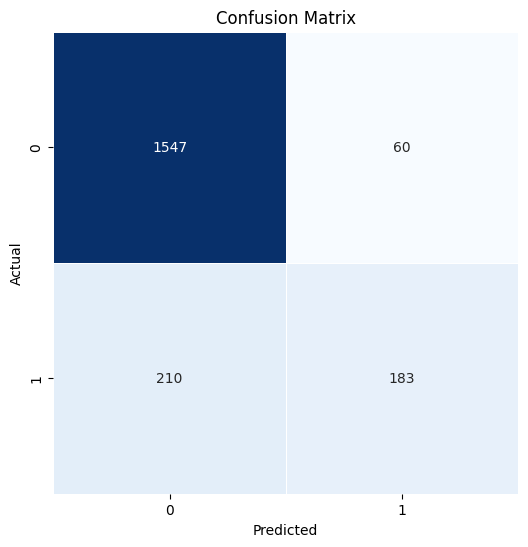

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Save the confusion matrix as an image

#plt.savefig('confusion_matrix.png')



* 5.6 To save the best features list as json for future use 

In [25]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

* 5.7 To save the best model using joblib

In [26]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import joblib
import os
# Save the best model to a file
joblib.dump(best_model, "../data/best_model1.pkl")

['../data/best_model1.pkl']

In [29]:
model = joblib.load("../data/best_model1.pkl")

In [30]:
model

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

## Step 6: Create Streamlit Web App

In [25]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

# Define the app title and layout
st.title("Bank Customer Churn Prediction App")

# Define input fields for features
credit_score = st.number_input("Credit Score", min_value=0, max_value=1000, value=600, step=1)
age = st.number_input("Age", min_value=18, max_value=100, value=30, step=1)
tenure = st.number_input("Tenure", min_value=0, max_value=10, value=5, step=1)
balance = st.number_input("Balance", min_value=0.0, max_value=300000.0, value=10000.0, step=100.0)
num_of_products = st.selectbox("Number of Products", [1, 2, 3, 4])
has_credit_card = st.selectbox("Has Credit Card", [0, 1])
is_active_member = st.selectbox("Is Active Member", [0, 1])
estimated_salary = st.number_input("Estimated Salary", min_value=0.0, max_value=300000.0, value=50000.0, step=100.0)
geography = st.selectbox("Geography", ["France", "Germany", "Spain"])
gender = st.selectbox("Gender", ["Female", "Male"])

# Create a button for making predictions
if st.button("Predict"):
    # Process input values
    input_data = pd.DataFrame(
        {
            "CreditScore": [credit_score],
            "Age": [age],
            "Tenure": [tenure],
            "Balance": [balance],
            "NumOfProducts": [num_of_products],
            "HasCrCard": [has_credit_card],
            "IsActiveMember": [is_active_member],
            "EstimatedSalary": [estimated_salary],
            "Geography_Spain": [1 if geography == "Spain" else 0],
          
        }
    )

    # Scale input data using the same scaler used during training
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Make a prediction using the trained model
    prediction = model.predict(input_data_scaled)

    # Display the prediction
    if prediction[0] == 1:
        st.success("The customer is at risk of churn.")
    else:
        st.success("The customer is not at risk of churn.")


ModuleNotFoundError: No module named 'streamlit'

 ## 7  Deploy the Web App

### To deploy your Streamlit app using Streamlit Sharing, follow these steps:

* add requirements.txt
To generate the requirements.txt file automatically, run the following command in your terminal:



pip freeze > requirements.txt





* Push your project to a public GitHub repository: Make sure your Streamlit app code, trained model (best_model.pkl), selected features JSON (selected_features.json), and any other required files (e.g., the confusion matrix image) are in a public GitHub repository.

    
    
* Sign up for Streamlit Sharing: If you haven't already, sign up for Streamlit Sharing at share.streamlit.io. You will need to request an invitation if you haven't joined before.

    
    
* Deploy your app: Once you're logged in to Streamlit Sharing, click on the New app button on the top right corner. Choose your GitHub repository and the branch where your app is located (usually main or master). Then, enter the path to your Streamlit app file (e.g., app.py) in the Path to app in repo field. Finally, click on Deploy.

    
    
* Streamlit Sharing will create a new app instance and deploy your app. This process might take a few minutes. Once it's done, you will see a URL for your deployed app.



* You can share this URL with others, and they can access your Streamlit app without needing to install or run anything on their local machines.


For more information on Streamlit Sharing and its features, visit the Streamlit Sharing documentation.

   # Final Result URL  https://heytec-sbankchurn-app-jj0fgc.streamlit.app/

# GITHUB:    https://github.com/Heytec/sbankchurn

# Assigment  

* Choose any dataset, create an end-to-end machine learning classification project using scikit-learn and Streamlit, and share the Streamlit URL and GitHub repository.

* Submit your assignment: Share the Streamlit URL and the GitHub repository link with your instructor or as required for the assignment submission.